# 第10章 图像分割

- 图像分割（Image segmentation）是指将图像划分成若干个性质相似、互不相交的区域的过程，其本质是像素的分类或聚类，目的是简化或改变图像的表示形式，使得图像更容易理解和分析。
- 图像分割依据像素灰度或颜色及其空间分布的基本特征—相似性、不连续性来完成，阈值分割、区域分裂与合并、运动目标分割等都是基于相似性的图像分割方法，例如把图像划分为灰度（亮度）、色彩、纹理或运动等属性大致相同的区域。不连续性体现为像素属性值空间分布的某种变化，往往对应于图像中属性不一致区域之间的过渡区域，如边缘、区域边界、纹理细节等，“第9章 边缘检测”就是此类图像分割的典型代表。

In [1]:
#导入本章示例用到的包,使用本文档中示例,先运行一次本段代码
import numpy as np
import cv2 as cv
from skimage import io,util,filters,feature,transform,\
                     draw,color,morphology,segmentation,measure
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline

## 10.1 阈值分割
- 如果前景物体或背景表面各自具有较为一致的光反射特性，且物体和背景之间、或不同物体之间表面的光反射特性差异较大，那么图像就会形成明暗不同的区域，只要选择一个合适的灰度值作为阈值，就可以根据像素灰度值的高低，把图像分割为前景区域和背景区域，关键是如何选择阈值。

### 10.1.2 基本全局阈值图像分割

### 示例：基本全局阈值图像分割

In [ ]:
#基本全局阈值图像分割

#读入一幅灰度图像
img = io.imread('./imagedata/rice.png')
#mg = data.camera()
#将图像数据转换为浮点型
imgf = np.float32(img)

#初始化迭代次数
count = 0;
#选择迭代停止控制参数
Delta_T =0.5
#新阈值
Thr_new = 0
#用图像的灰度均值作为初始阈值
Thr = np.mean(imgf)
#迭代计算基本全局阈值
done = True
while done:
    count = count + 1  #统计迭代次数
    #计算两类像素的均值并更新阈值
    Thr_new = 0.5*(np.mean(imgf[imgf>Thr]) + np.mean(imgf[imgf<=Thr]))
    if np.abs(Thr - Thr_new) < Delta_T:
        done = False
    Thr = Thr_new
    
#用得到的阈值分割图像
img_bw = img > Thr
#显示阈值及迭代次数
print('阈值=',Thr)
print('迭代次数=',count)

#显示图像阈值分割结果
plt.figure(figsize=(15,5))
plt.gray()

#输入图像
plt.subplot(1,3,1), plt.imshow(img)
plt.title('Input image')
plt.axis('off')
#图像灰度直方图
plt.subplot(1,3,2), plt.hist(img.ravel(), bins=256)
plt.title('Histogram')
plt.axvline(Thr, color='r')
#二值图像
plt.subplot(1,3,3), plt.imshow(img_bw)
plt.title('Segment result')
plt.axis('off')

plt.show()

## 10.1.3 Otsu最佳全局阈值图像分割

- Otsu最佳阈值分割方法是由日本学者大津(Nobuyuki Otsu)于1979年提出的，又叫大津法。它根据图像灰度的统计特性，借助于灰度直方图，将图像分成目标和背景两类像素。Otsu定义了类间方差（variance between classes）的概念来衡量目标和背景两类像素之间的的可分性，如果目标和背景之间的类间方差越大，说明图像中这两部分像素的灰度值的差别越大。若部分目标被错分为背景，或部分背景被错分为目标，都会导致类间方差变小。因此，能够使类间方差最大的分割阈值意味着错分概率也最小。

### 示例：Otsu单阈值分割

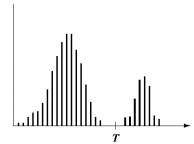

#### OpenCV 提供的函数
- retval, dst = cv.threshold(src, thresh, maxval, type[, dst])
    - Applies a fixed-level threshold to each array element.

In [ ]:
#OpenCV: Otsu单阈值分割

#读入一幅灰度图像
img = cv.imread('./imagedata/rice.png', 0)

#Otsu阈值分割
thresh, imgbw1 = cv.threshold(img,127,255,cv.THRESH_OTSU | cv.THRESH_BINARY)
thresh, imgbw2 = cv.threshold(img,127,255,cv.THRESH_OTSU | cv.THRESH_BINARY_INV)

#显示Otsu阈值
print('Otsu阈值 =',thresh)

#显示结果
plt.figure(figsize=(16,5))
plt.gray()

#原图像
plt.subplot(1,4,1), plt.imshow(img)
plt.title('Input image')
plt.axis('off')
#图像灰度直方图
plt.subplot(1,4,2), plt.hist(img.ravel(), bins=256)
plt.title('Histogram')
plt.axvline(thresh, color='r')
#二值图像
plt.subplot(1,4,3), plt.imshow(imgbw1 )
plt.title('Otsu segmented result')
plt.axis('off')
#二值图像
plt.subplot(1,4,4), plt.imshow(imgbw2)
plt.title('Otsu segmented result')
plt.axis('off')

plt.show()

### Scikit-image 提供的函数
- skimage.filters.threshold_otsu(image=None, nbins=256, *, hist=None)
    - Return threshold value based on Otsu’s method.

In [ ]:
#Scikit-image: Otsu单阈值分割

#读入一幅灰度图像
img = io.imread('./imagedata/rice.png')

#计算Otsu阈值
thresh = filters.threshold_otsu(img)
#对图像进行阈值分割
img_binary = img > thresh

#显示Otsu阈值
print('Otsu阈值=',thresh)

#显示结果
plt.figure(figsize=(12,5))
plt.gray()
#输入图像
plt.subplot(1,3,1), plt.imshow(img)
plt.title('Input image')
plt.axis('off')
#图像灰度直方图
plt.subplot(1,3,2), plt.hist(img.ravel(), bins=256)
plt.title('Histogram')
plt.axvline(thresh, color='r')
#二值图像
plt.subplot(1,3,3), plt.imshow(img_binary )
plt.title('Otsu segmented result')
plt.axis('off')

plt.show()

### 示例：Otsu多阈值分割（Multi-Otsu Thresholding）

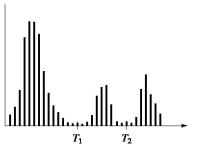

In [ ]:
# Scikit-image: Otsu多阈值分割

#读入一幅灰度图像
img = io.imread('./imagedata/cameraman.tif')

#计算Otsu多阈值,选择默认classes=3,即计算2个阈值将图像分割为3类区域
thresholds = filters.threshold_multiotsu(img, classes=3)
#显示Otsu得到的2个阈值
print('Otsu多阈值=',thresholds)

# 使用阈值将图像分割成3类区域,取值分别为0,1,2
img_regions = np.digitize(img, bins=thresholds)

#显示结果
plt.figure(figsize=(16,5))
plt.gray()

#输入图像
plt.subplot(1,3,1); plt.imshow(img)
plt.title('Input image')
plt.axis('off')
#图像灰度直方图,叠加两个用multi-Otsu方法得到的阈值
plt.subplot(1,3,2); plt.hist(img.ravel(), bins=256)
plt.title('Histogram')
for thresh in thresholds:
    plt.axvline(thresh, color='r')
#多阈值分割结果
plt.subplot(1,3,3); plt.imshow(img_regions)
plt.title('Multi-Otsu segmented result')
plt.axis('off')

plt.show()

### 10.1.4 自适应阈值图像分割

- 噪声、非均匀光照都会影响图像全局阈值分割效果，严重时会导致分割失败。选择全局阈值时，主要依赖图像灰度直方图这一总体统计特征。
- 局部均值和方差这两个统计量，描述了像素附近的对比度和明暗程度，体现了图像的不均匀性和局部灰度分布的特点，显然也可用来确定分割该像素的局部阈值。

### 示例：自适应阈值图像分割

### OpenCV 提供的函数
- dst = cv.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst])
    - Applies an adaptive threshold to an array. adaptiveMethod = cv.ADAPTIVE_THRESH_MEAN_C or cv.ADAPTIVE_THRESH_GAUSSIAN_C

In [ ]:
#OpenCV: 自适应阈值图像分割Adaptive Thresholding

#读入一幅灰度图像
img = cv.imread('./imagedata/rice.png', 0)

#Otsu全局阈值分割
ret,binary_otsu = cv.threshold(img,127,255, cv.THRESH_OTSU | cv.THRESH_BINARY)
#自适应阈值图像分割
binary_localmean = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,blockSize=35,C=-15)

#显示结果
plt.figure(figsize=(12,5))
plt.gray()
#输入图像
plt.subplot(1,3,1); plt.imshow(img)
plt.title('Input image')
plt.axis('off')
#Otsu全局阈值分割结果
plt.subplot(1,3,2); plt.imshow(binary_otsu)
plt.title('Otsu global thresholding')
plt.axis('off')
#local mean局部阈值分割结果
plt.subplot(1,3,3); plt.imshow(binary_localmean)
plt.title('local mean thresholding')
plt.axis('off')

plt.tight_layout()
plt.show()

### 示例：自适应阈值分割文本图像

## Scikit-image 提供的函数
- skimage.filters.threshold_sauvola(image, window_size=15, k=0.2, r=None)
    - Applies Sauvola local threshold to an array. Sauvola is a modification of Niblack technique.
- skimage.filters.threshold_local(image, block_size, method='gaussian', offset=0, mode='reflect', param=None, cval=0)
    - Compute a threshold mask image based on local pixel neighborhood.

In [ ]:
#Scikit-image: 自适应阈值分割文本图像

#读入一幅文本灰度图像
img = io.imread('./imagedata/page.png')

#计算Otsu全局阈值
thresh_otsu= filters.threshold_otsu(img)
binary_otsu = img > thresh_otsu
# Sauvola局部阈值
thresh_sauvola = filters.threshold_sauvola(img, window_size=35)
binary_sauvola = img > thresh_sauvola
#Gaussian加权均值局部阈值
thresh_gaussian = filters.threshold_local(img, block_size=35, method='gaussian',offset=5)
binary_gaussian = img > thresh_gaussian

#显示结果
plt.figure(figsize=(12,6))
plt.gray()

#输入图像
plt.subplot(2,2,1); plt.imshow(img)
plt.title('Input image')
plt.axis('off')
#Otsu全局阈值分割结果
plt.subplot(2,2,2); plt.imshow(binary_otsu)
plt.title('Otsu global thresholding')
plt.axis('off')
# Sauvola局部阈值分割结果
plt.subplot(2,2,3); plt.imshow(binary_sauvola)
plt.title('Sauvola local thresholding')
plt.axis('off')
# Gaussian加权局部阈值分割结果
plt.subplot(2,2,4); plt.imshow(binary_gaussian)
plt.title('Gaussian local thresholding')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#OpenCV: 自适应阈值文本图像分割

#读入一幅灰度图像
img = cv.imread('./imagedata/page.png', 0)

#全局Otsu阈值分割
ret,img_otsu = cv.threshold(img,127,255, cv.THRESH_OTSU + cv.THRESH_BINARY)
#自适应阈值图像分割
img_adamean = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,35,5)
img_adagauss = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,35,5)

#显示结果
plt.figure(figsize=(12,6))
plt.gray()

#原图像
plt.subplot(2,2,1); plt.imshow(img)
plt.title('Input image')
plt.axis('off')
#Otsu全局阈值分割结果
plt.subplot(2,2,2); plt.imshow(img_otsu)
plt.title('Otsu global thresholding')
plt.axis('off')
# ADAPTIVE_THRESH_MEAN_C分割结果
plt.subplot(2,2,3); plt.imshow(img_adamean)
plt.title('local mean thresholding')
plt.axis('off')
# ADAPTIVE_THRESH_GAUSSIAN_C加权局部阈值分割结果
plt.subplot(2,2,4); plt.imshow(img_adagauss)
plt.title('local Gaussian thresholding')
plt.axis('off')

plt.tight_layout()
plt.show()

## 10.2 区域生长 region growing
- 区域生长（Region growing）根据预先定义的生长准则，将像素或子区域组合成更大区域的过程。区域生长先从需要分割的区域中找出一个或多个种子像素（种子点）作为生长的起始点，然后将与种子像素具有相同或相似性质的邻域像素，合并到种子像素所在的区域中。再将这些新添加像素作为新的种子像素，继续进行上述操作，直到没有满足生长准则的像素时，停止区域生长。
- 区域生长算法的关键，一是确定相似性准则和区域生长的条件，二是停止规则的表示，三是种子像素的选取。相似性度量方法的选择不仅取决于所面对的问题，还取决于所处理图像的数据类型，如灰度图像、RGB真彩色图像等。下面以灰度图像为例，以候选像素灰度值与已生长区域像素灰度均值之差作为相似性度量方法，来说明区域生长算法的原理。


### 定义区域生长函数region growing
- #### 先运行函数定义cell装载函数，才能调用

In [3]:
#定义区域生长函数region growing
def regionGrow(grayimage, seeds, thresh, neighbors):
    """
    输入参数:
        grayimage - 灰度图像,ndarray
            seeds - 种子点下标列表，形如:[(x0,y0),(x1,y1),...]
           thresh - 阈值,浮点数,在[0,1]之间取值,用于度量衡量邻域像素灰度值与已生长区域的相似性。
        neighbors - 采用的邻域类型，整数，4或8，对应4-邻域或8-邻域。
    返回值：
         seedMark - 二值图像,增长区域像素=255,其他=0
    """
    #对输入图像做归一化处理[0,1]
    gray = util.img_as_float(grayimage.copy())
    #用于保存种子区域增长结果
    seedMark = np.zeros(gray.shape).astype(np.uint8)
    
    #根据增长时的邻域类型确定邻域像素下标偏移量
    if neighbors == 8:
        #8-邻域,顺时针排列
        connection = [(-1, -1), (-1, 0), (-1, 1), (0, 1),
                      (1, 1), (1, 0), (1, -1), (0, -1)]
    elif neighbors == 4:
        #4-邻域,顺时针排列
        connection = [(-1, 0), (0, 1), (1, 0), (0, -1)]
    
    #已增长的像素数
    numpixels = 1.0
    #已生长区域像素灰度均值
    growed_region_mean =  gray[seeds[0][0],seeds[0][1]]
    #已生长区域像素灰度值之和
    growed_region_sum = growed_region_mean
    
    #seeds种子点列表内无元素时候生长停止
    while len(seeds) != 0:
        #种子点列表头部元素弹出
        pt = seeds.pop(0)
        for i in range(neighbors):
            #遍历当前种子点邻域像素
            tmpX = pt[0] + connection[i][0]
            tmpY = pt[1] + connection[i][1]
            #检测该邻域点是否位于图像内(下标是否有效)
            if tmpX < 0 or tmpY < 0 or tmpX >= gray.shape[0] or tmpY >= gray.shape[1]:
                continue
            #判断是否满足相似性准则:
            #该像素的灰度值和与已生长区域灰度均值之差的绝对值小于阈值thresh
            gray_diff = abs(gray[tmpX, tmpY] - growed_region_mean)
            if (gray_diff < thresh) and (seedMark[tmpX, tmpY] == 0):
                #将当前像素在已生长区域的灰度值设为255
                seedMark[tmpX, tmpY] = 255
                #将当前像素添加到种子点列表
                seeds.append((tmpX, tmpY))
                
                #更新已生长区域像素灰度值之和
                growed_region_sum += gray[tmpX, tmpY]
                #更新已增长的像素数
                numpixels += 1
                #更新已生长区域像素灰度均值
                growed_region_mean = growed_region_sum/numpixels
    
    #返回结果
    return seedMark
#----------------------------------

### 示例：调用自定义区域增长函数regionGrow,分割图像

In [ ]:
#调用自定义区域增长函数regionGrow,分割图像

#读入一幅灰度图像
img = io.imread('./imagedata/medtest.png')

#选择种子点
seeds = [(125,250)]
#区域增长
seedMark1 = regionGrow(img, seeds, thresh=0.06, neighbors=8 )
#选择种子点,改变分割阈值大小
seeds = [(125,250)]
#区域增长
seedMark2 = regionGrow(img, seeds, thresh=0.2, neighbors=8 )

#将分割区域叠加到原图像上
img_res1 = img.copy()
img_res1[seedMark1>0] = 255
img_res2 = img.copy()
img_res2[seedMark2>0] = 255

#显示结果
plt.figure(figsize=(16,8))
plt.gray()
#原图像
plt.subplot(1,3,1); plt.imshow(img)
plt.title('Input image')
plt.axis('off')
#区域增长分割结果,叠加到按图像,thresh=0.06
plt.subplot(1,3,2); plt.imshow(img_res1)
plt.title('Region growing,thresh=0.06')
plt.axis('off')
# Niblack局部阈值分割结果,叠加到按图像,thresh=0.2
plt.subplot(1,3,3); plt.imshow(img_res2)
plt.title('Region growing,thresh=0.2')
plt.axis('off')

plt.show()

## 示例：采用鼠标交互方式调用自定义区域增长函数regionGrow,分割图像

In [ ]:
#采用鼠标交互方式调用自定义区域增长函数regionGrow,分割图像
#在窗口显示的图像上双击鼠标左键,以鼠标点击位置为种子点
# mouse callback function
def Seg_regiongrow(event,x,y,flags,param):
    global  img_gray, img_gray2
    if event == cv.EVENT_LBUTTONDBLCLK:
        #选择种子点
        seeds = [(y,x)]
        #区域增长
        seedMark = regionGrow(img_gray, seeds, thresh=0.1, neighbors=8 )
        #将分割区域叠加到原图像上
        img_gray[seedMark>0] = 255
    if event == cv.EVENT_RBUTTONDOWN:  # 单击右键从新开始选择
        img_gray = img_gray2.copy()
#---------------------------------- 

#主程序
#读入一幅灰度图像
img_gray = io.imread('./imagedata/medtest.png')
img_gray2 = img_gray.copy()

#创建显示窗口,绑定鼠标回调函数
cv.namedWindow('image')
cv.setMouseCallback('image',Seg_regiongrow)
#循环执行直到按Esc键退出
while(1):
    cv.imshow('image',img_gray)
    if cv.waitKey(20) & 0xFF == 27:  #按Esc键退出
        break        
        
#释放占用资源
cv.destroyAllWindows()

## 10.3 分水岭图像分割 Watershed segmentation

- 分水岭图像分割方法（Watershed segmentation）借用地形学概念，把图像类比为测地学上的拓扑地貌，图像中每一像素的灰度值表示该点的海拔高度，高灰度值像素代表山脉，低灰度值像素代表盆地。每一个局部极小值及其影响区域称为集水盆（catchment basin），集水盆周边的分水岭脊线形成分水线（watershed ridge line）。分水岭图像分割的目的，是找出图像中所有的集水盆区域及相应的分水线，因为这些集水盆区域通常对应于目标区域，分水线则对应于目标区域的轮廓线。

- 分水线的形成可以通过模拟涨水淹没过程来说明。设想在地面每一个局部极小值位置（相当于洼地），刺穿一个小孔，让水通过小孔以均匀的速率上升，从低到高淹没整个地面。随着水位的上涨，对应每一个局部极小值的集水盆水面会慢慢向外扩展，当不同集水盆中的水面将要汇聚在一起时，在两个集水盆水面汇合处构筑大坝阻止水面汇合。这个过程不断延续直到水位上涨到最大值（对应于图像中灰度级的最大值），这些阻止各个集水盆水面交汇的大坝就是分水线。一旦确定出分水线的位置，就能将图像用一组封闭的曲线分割成不同的区域。

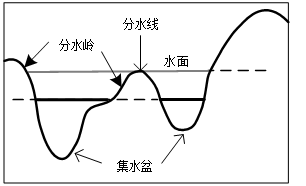

### 示例：二值图像中的目标分离―采用距离变换的分水岭图像分割

## Scikit-image分水岭图像分割
- skimage.segmentation.watershed(image, markers=None, connectivity=1, offset=None, mask=None, compactness=0, watershed_line=False)
- skimage.feature.peak_local_max(image, min_distance=1, threshold_abs=None, threshold_rel=None, exclude_border=True, indices=True, num_peaks=inf, footprint=None, labels=None, num_peaks_per_label=inf, p_norm=inf)

In [ ]:
#Scikit-image: 采用距离变换的分水岭图像分割,将图中粘连的圆型区域分离开

#读入一幅二值图像
img = io.imread('./imagedata/circles.png')

#对图像进行距离变换
distance = cv.distanceTransform(img,cv.DIST_L2,5)

#检出距离图像中的局部最大值作为标记
#较小的footprint可能导致检出碎片区域局部最大值
coords = feature.peak_local_max(distance.copy(),footprint=np.ones((7,7)),labels=img)

#对局部最大值数组进行标记,即为每个局部最大值位置赋予唯一序号
#创建标记数组
maskers = np.zeros(distance.shape, dtype=bool)
maskers[tuple(coords.T)] = True
markers = measure.label(maskers)
#对负距离图像进行基于标记的分水岭分割,得到图像中的连通区域已标记
labels = segmentation.watershed(-distance, markers, mask=img, watershed_line=True)
#对结果进行伪彩色处理
labels_rgb = color.label2rgb(labels, bg_label=0,bg_color=(1,1,1))

#显示连通区域数量
print('区域数量：',np.max(labels))

#显示结果
plt.figure(figsize=(16,8))
plt.gray()

#输入图像,物体之间粘连重叠
plt.subplot(1,4,1); plt.imshow(img)
plt.title('Overlapping objects')
plt.axis('off')
#通过距离变换得到的距离图
plt.subplot(1,4,2); plt.imshow(distance)
plt.title('Distances')
plt.axis('off')
#对距离图取负
plt.subplot(1,4,3); plt.imshow(- distance)
plt.title('Negative Distances')
plt.axis('off')
#图像中的区域已分开,不同标号区域用不同彩色显示
plt.subplot(1,4,4); plt.imshow(labels_rgb )
plt.title('Separated objects')
plt.axis('off')

plt.show()

## OpenCV分水岭图像分割
- markers=cv.watershed(image, markers)
    - Performs a marker-based image segmentation using the watershed algorithm.
- dst=cv.distanceTransform(src, distanceType, maskSize[, dst[, dstType]])
    - Calculates the distance to the closest zero pixel for each pixel of the source image.

In [ ]:
#OpenCV: 分水岭图像分割，将图中粘连的圆型区域分离开

#读入一幅图像
img = cv.imread('./imagedata/circles.png',0)
#获取图像的高/宽
rows, cols = img.shape[0:2]

#将图像转换为彩色图像格式
img_c = cv.cvtColor(img, cv.COLOR_GRAY2RGB)

#采用OTSU阈值分割，得到二值图像
ret, imgbw = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

#形态学滤波去除噪点
#创建一个3×3的正方形结构元素
kernel = cv.getStructuringElement(cv.MORPH_RECT,(3,3))
img_opening = cv.morphologyEx(imgbw,cv.MORPH_OPEN,kernel, iterations = 1)

#对结果进行膨胀
sure_bg = cv.dilate(img_opening, kernel,iterations=2)
#对图像进行距离变换
dist_transform = cv.distanceTransform(img_opening,cv.DIST_L2,5)
# 得到明确的前景区域
ret, sure_fg = cv.threshold(dist_transform, 0.7*dist_transform.max(), 255,cv.THRESH_BINARY)
#得到不明确区域 
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

#对明确的前景区域进行标记，得到分水岭算法所需的标记图像
ret, markers = cv.connectedComponents(sure_fg)
#将标记图像中不明确区域的像素值置为0
markers[unknown==255] = 0
markers2 = markers.copy()
#对图像实施分水岭分割
markers_seg = cv.watershed(img_c,markers2)

#清除图像边界处的分水线
markers_seg[0:rows,0] = 0
markers_seg[0:rows,cols-1] = 0
markers_seg[0,0:cols] = 0
markers_seg[rows-1,0:cols] = 0
#将分水线叠加到原图像上
imgresult = img.copy()
imgresult[markers_seg==-1] = 0

#显示连通区域数量
print('区域数量：',markers_seg.max())

#显示结果
plt.figure(figsize=(12,8))
plt.gray()

#原图像
plt.subplot(2,3,1); plt.imshow(img)
plt.title('Original image')
plt.axis('off')
#阈值分割得到的二值图像
plt.subplot(2,3,2); plt.imshow(imgbw)
plt.title('Segmented image')
plt.axis('off')
#通过距离变换得到的距离图
plt.subplot(2,3,3); plt.imshow(dist_transform)
plt.title('Distances')
plt.axis('off')
#对距离图取阈值，得到待分割区域的标记区域 
plt.subplot(2,3,4); plt.imshow(sure_fg)
plt.title('sure foreground area')
plt.axis('off')

#标记图像
plt.subplot(2,3,5); plt.imshow(markers,cmap='RdPu')
plt.title('markers')
plt.axis('off')
#图像中的区域已分开,不同标号区域用不同彩色显示
plt.subplot(2,3,6); plt.imshow(imgresult)
plt.title('Separated objects')
plt.axis('off')

plt.show()

In [15]:
#io.imsave('circles_labels_color.png',util.img_as_ubyte(labels_rgb))

## 示例：结合边缘检测的分水岭图像分割
- Make segmentation using edge-detection and watershed
 -  Scikit-image 版本>0.20.0时，markers数据类型改为 int型
 - segmentation.watershed(edges, markers)

In [ ]:
#Scikit-image: 结合边缘检测的分水岭图像分割
# Make segmentation using edge-detection and watershed.
#读入一幅灰度图像
img = io.imread('./imagedata/coins.png')

#边缘检测
#edges = filters.sobel(img)
#使用 Canny 边缘检测
edges = feature.canny(img) #Scikit-image: Canny 算子,采用缺省参数

#对图像做阈值分割，得到部分前景和背景像素作为分水岭的种子标记
# Scikit-image 版本>0.20.0时，markers数据类型改为 int型
markers = np.zeros(img.shape, dtype = int)
foreground = 1
background = 2
markers[img < 30] = background
markers[img > 150] = foreground

#也可采用OpenCV函数实现分割
#将图像转换为彩色图像格式
#edges_c = cv.cvtColor(edges.astype(np.uint8), cv.COLOR_GRAY2RGB)
#对边缘图像做分水岭分割
#imws = cv.watershed(edges_c, markers)

imws = segmentation.watershed(edges, markers)
#得到对应的二值图像
imbw = (imws==foreground)
#对图像做形态学开运算
imbw = morphology.binary_opening(imbw,morphology.disk(3))
#对二值图像中的连通区域进行标记
img_label = measure.label(imbw)
#对标记图像作伪彩色处理,并叠加到原图像上
img_color = color.label2rgb(img_label, image=img, bg_label=0)

# 显示分割结果
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 8))
ax = axes.ravel()
for a in ax:
    a.axis('off')

#硬币图像
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Image')
#Canny边缘
ax[1].imshow(edges, cmap='gray')
ax[1].set_title('Canny edges')
#分水岭分割得到的二值图像
ax[2].imshow(imbw, cmap='gray')
ax[2].set_title('Canny+Watershed segmented Image')
#分割区域伪彩色处理结果
ax[3].imshow(img_color)
ax[3].set_title('Pseudo-color labeled image')
    
fig.tight_layout()
plt.show()

## 10.4 彩色图像分割

### 鼠标选取感兴趣区域（ROI）画不规则多边形

In [5]:
# 鼠标选取感兴趣区域（ROI）画不规则多边形
# -----------------------鼠标操作相关------------------------
#在显示的图像上单击鼠标左键选点,双击左键确认结束,单击右键从新开始
#按任意键退出程序
PointsChosen = [] #保存鼠标左键选取的像素坐标(x,y),元组列表list

def on_mouse(event, x, y, flags, param):
    global img
    global PointsChosen  # 存入选择的点
    global img2
    img2 = img.copy()  # 重新在原图上画出点及连线
     
    if event == cv.EVENT_LBUTTONDOWN:  #单击左键选点
        #将选取的点保存到list列表里
        PointsChosen.append((x, y))
        #绿色圆环画出鼠标点击的像素
        cv.circle(img2, (x, y), 5, (0, 255, 0), 2)
        #将鼠标选的点用红色直线连起来
        for i in range(len(PointsChosen) - 1):
            cv.line(img2, PointsChosen[i], PointsChosen[i + 1], (0, 0, 255), 2)        
        #显示绘图
        cv.imshow('src', img2)
        
    if event == cv.EVENT_LBUTTONDBLCLK: #双击左键确认结束,得到ROI mask
        ROImask_byMouse()
        #PointsChosen = []  
        
    if event == cv.EVENT_RBUTTONDOWN:  # 单击右键从新开始选择
        PointsChosen = []
        cv.imshow('src', img2)
        
# ----得到选取的多边形顶点,得到ROI掩膜图像并做其他处理-------------

def ROImask_byMouse():
    global ROImask
    ROImask = np.zeros(img.shape, np.uint8)
    pts = np.array(PointsChosen, np.int32)  # pts是多边形的顶点列表（顶点集）
    pts = pts.reshape((-1, 1, 2))
    # 这里 reshape 的第一个参数为-1, 表明这一维的长度是根据后面的维度的计算出来的。
    # OpenCV中需要先将多边形的顶点坐标变成顶点数×1×2维的矩阵，再来绘制
    
    #---填充多边形---
    ROImask = cv.fillPoly(ROImask, [pts], (255, 255, 255))
    cv.imshow('mask', ROImask)
    ROI = cv.bitwise_and(ROImask, img)
    cv.imshow('ROI', ROI)

#-----读取一幅图像,用鼠标选择ROI----------
img = cv.imread('./imagedata/Bridewedding.jpeg')

cv.namedWindow('src')
cv.setMouseCallback('src', on_mouse)
cv.imshow('src', img)
cv.waitKey(0)
cv.destroyAllWindows()

### 深度揭秘—蓝幕抠图技术的实现

### 指定样本区域

In [ ]:
#指定样本区域
#读取一幅彩色图像
imgc = io.imread('./imagedata/Bridewedding.jpeg')

#采用棋盘格距离Chebyshev disctance
#分割阈值RGB 
Thresh = np.array([50,50,90])
#指定样本掩膜
sampling_mask = np.zeros(imgc.shape[0:2])
sampling_mask[20:100,20:50] = 255

#计算样本像素RGB颜色分量的平均值
bg_mean = np.mean(imgc[sampling_mask>0],axis=0).astype((np.float))
#确定属于背景的像素,即在RGB颜色空间中判断每个像素的RGB值,
#是否落在以样本均值为中心,2*Thresh为边长的矩形空间内
bgmask = np.abs(imgc.astype(np.float) - bg_mean)< Thresh
bgmask = np.all(bgmask,axis=2)

#抠图,令背景颜色等于指定值[r,g,b]
img_res = imgc.copy()
img_res[bgmask>0]= [125,125,125]

#显示结果
plt.figure(figsize=(16,8))
plt.gray()

#输入图像
plt.subplot(1,3,1), plt.imshow(imgc)
plt.title('Input image')
plt.axis('off')
#背景掩膜
plt.subplot(1,3,2), plt.imshow(bgmask)
plt.title('Background mask')
plt.axis('off')
#抠图结果
plt.subplot(1,3,3), plt.imshow(img_res)
plt.title('Image matting ')
plt.axis('off')

plt.show()

### 用鼠标交互选背景样本像素区域

In [2]:
# 蓝幕抠图技术的实现--用鼠标交互选背景样本像素区域

# -----------------------鼠标操作相关------------------------
#在显示的图像上单击鼠标左键选点,双击左键确认结束,单击右键从新开始
#按任意键退出程序
PointsChosen = [] #保存鼠标左键选取的像素坐标(x,y),元组列表list
# 定义鼠标事件回调函数mouse callback function
def on_mouse(event, x, y, flags, param):
    global img
    global PointsChosen  # 存入选择的点
    global img2
    img2 = img.copy()  # 重新在原图上画出点及连线
     
    if event == cv.EVENT_LBUTTONDOWN:  #单击左键选点
        #将选取的点保存到list列表里
        PointsChosen.append((x, y))
        #绿色圆环画出鼠标点击的像素
        cv.circle(img2, (x, y), 5, (0, 255, 0), 2)
        #将鼠标选的点用红色直线连起来
        for i in range(len(PointsChosen) - 1):
            cv.line(img2, PointsChosen[i], PointsChosen[i + 1], (255, 0, 0), 2)        
        #显示绘图
        cv.imshow('Image matting', img2[:,:,::-1])
        
    if event == cv.EVENT_LBUTTONDBLCLK: #双击左键确认结束,得到ROI mask
        #调用抠图函数
        image_matting_samplingbyMouse()         
        
    if event == cv.EVENT_RBUTTONDOWN:  # 单击右键从新开始选择
        PointsChosen = []
        cv.imshow('Image matting', img2[:,:,::-1])
#----------------------------------------------------

# ----用选取的多边形顶点,得到ROI掩膜图像并做其他处理-------------

def image_matting_samplingbyMouse():
    global sampling_mask, img, img2, PointsChosen,shift
    #样本像素掩膜
    sampling_mask =  np.zeros(img.shape[0:2])
    
    pts = np.array(PointsChosen, np.int32)  # pts是多边形的顶点列表（顶点集）
    #---填充多边形---
    sampling_mask = cv.fillPoly(sampling_mask, [pts], (255, 255, 255))
    
    #计算样本像素RGB颜色分量的平均值
    bg_mean = np.mean(img[sampling_mask>0],axis=0).astype((np.float))
    #确定属于背景的像素,即在RGB颜色空间中判断每个像素的RGB值,
    #是否落在以样本均值为中心,2*Thresh为边长的矩形空间内
    bgmask = np.abs(img.astype(np.float) - bg_mean)< Thresh
    bgmask = np.all(bgmask,axis=2)

    #抠图,令背景颜色等于指定值[r,g,b]
    img2[bgmask>0]= [125,125,125]
    
    #清空顶点列表
    PointsChosen = []
    #显示最终结果
    cv.imshow('Image matting',img2[:,:,::-1])
#----------------------------------------------------

#主程序    
#-----读取一幅图像,用鼠标选择ROI----------
#读取一幅彩色图像
img = io.imread('./imagedata/Bridewedding.jpeg')

#RGB分割阈值
Thresh = np.array([50,50,90])

cv.namedWindow('Image matting')
cv.setMouseCallback('Image matting', on_mouse)
cv.imshow('Image matting', img[:,:,::-1])
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
sampling_mask.shape

## 10.5 运动目标分割

- 运动目标分割（Moving object segmentation），又称运动目标检测（Moving object detection），或运动分割（Motion segmentation），利用运动信息获取图像中移动目标区域，广泛应用于智能视频监控、视频压缩编码、视频检索、人机交互、虚拟现实、机器人视觉、自主导航等领域。在成像过程中，摄像机自身还是场景中物体的运动，都会使图像传感器与被观察目标之间产生相对位移，表现为序列图像中像素与场景物点的映射关系发生改变，引起图像像素属性值的变化。

## 示例：摄像机固定配置时的视频运动目标分割

### 1. 采用参考图像帧背景减除法实现视频图像运动目标检测

In [14]:
#采用参考图像帧背景减除法实现视频图像运动目标检测
#创建指定视频文件读取对象
videocap = cv.VideoCapture('./imagedata/vtest.avi')

#检查是否正确打开视频文件
if videocap.isOpened(): 
    oepn, frame = videocap.read()
    # 获取视频fps
    fps = videocap.get(cv.CAP_PROP_FPS)
    delay = int(1000/fps)
else:
    open = False

#指定分割阈值
Thresh =25
#读取视频序列中第一帧作为参考背景 
ret, bgframe = videocap.read()

#逐帧显示并处理    
while open:
    ret, frame = videocap.read() #读取一帧图像
    #if frame is None: #已处理完最后一帧,退出循环
    #   break
    if not ret:  #已处理完最后一帧，退出循环
        print("Can't receive frame! Exiting ...")
        break    

    #计算每帧图像个颜色通道与参考帧之间的差值
    framediff = bgframe.astype(np.float) - frame.astype(np.float)
    fgmask = np.any(np.abs(framediff)> Thresh, axis=2)
    fgmask = util.img_as_ubyte(fgmask) 
     
    #显示结果
    cv.namedWindow('video playing',cv.WINDOW_NORMAL)
    cv.namedWindow('Segmented result',cv.WINDOW_NORMAL)
    cv.imshow('video playing', frame) 
    cv.imshow('Segmented result',fgmask)
        
    if cv.waitKey(delay) & 0xFF == 27: #按帧率播放
        break

#释放视频读取资源
videocap.release()
#释放窗口显示资源
cv.destroyAllWindows()

### 2.采用近似中值滤波背景模型实现运动目标分割

In [15]:
#采用近似中值滤波背景模型实现运动目标分割
#Approximate Median Filter background model
#创建指定视频文件读取对象
videocap = cv.VideoCapture('./imagedata/vtest.avi')

#检查是否正确打开视频文件
if videocap.isOpened(): 
    oepn, frame = videocap.read()
    # 获取视频fps
    fps = videocap.get(cv.CAP_PROP_FPS)
    delay = int(1000/fps)
else:
    open = False

#指初始化阈值和更新增量beta
Thresh =20
Beta = 1.0

#读取视频序列中第一帧作为参考背景 
ret, bgframe = videocap.read()
bgframe = np.float32(bgframe)

#逐帧显示并处理    
while open:
    ret, frame = videocap.read() #读取一帧图像
    if frame is None:  #已处理完最后一帧,退出循环
        break
   
    #计算每帧图像个颜色通道与参考帧之间的差值
    framediff = bgframe.astype(np.int) - frame.astype(np.int)
    #更新背景模型 Update the median of each pixel value
    decidx = framediff>0
    incidx = framediff<0
    bgframe[decidx] = bgframe[decidx] - Beta
    bgframe[incidx] = bgframe[incidx] + Beta
    #计算差值并取绝对值
    fgmask = np.any(np.abs(framediff)> Thresh, axis=2)
    fgmask = util.img_as_ubyte(fgmask)
       
    #显示结果
    cv.namedWindow('video playing',cv.WINDOW_NORMAL)
    cv.namedWindow('Segmented result',cv.WINDOW_NORMAL)
    cv.imshow('video playing', frame) 
    cv.imshow('Segmented result',fgmask)
        
    if cv.waitKey(delay) & 0xFF == 27: #按帧率播放
        break

#释放视频读取资源
videocap.release()
#释放窗口显示资源
cv.destroyAllWindows()

### 3. 运动目标分割-采用OpenCV的MoG2背景模型

In [8]:
#采用OpenCV的MoG2背景模型的运动目标分割
#创建指定视频文件读取对象
videocap = cv.VideoCapture('./imagedata/vtest.avi')

#创建MoG背景模型对象
motionsegmog = cv.createBackgroundSubtractorMOG2()

#检查是否正确打开视频文件
if videocap.isOpened(): 
    oepn, frame = videocap.read()
    # 获取视频fps
    fps = videocap.get(cv.CAP_PROP_FPS)
    delay = int(1000/fps)
else:
    open = False
    
#cv.namedWindow('video playing',cv.WINDOW_NORMAL)
#cv.namedWindow('Segmented result',cv.WINDOW_NORMAL)
#逐帧显示并处理
while open:
    ret, frame = videocap.read() #读取一帧图像
    #if frame is None:  #已处理完最后一帧,退出循环
    #    break
    if not ret:  #已处理完最后一帧，退出循环
        print("Can't receive frame! Exiting ...")
        break
    #运动分割
    fgmask = motionsegmog.apply(frame)    
   
    #显示结果
    cv.imshow('video playing', frame) 
    cv.imshow('Segmented result',fgmask)
        
    if cv.waitKey(delay) & 0xFF == 27: #按帧率播放
        break
        
#释放视频读取资源
videocap.release()
#释放窗口显示资源
cv.destroyAllWindows()

# 【彩蛋系列】 之 基于深度学习的人脸检测

In [ ]:
# OpenCV: 基于深度学习的人脸检测

#读入一幅图像
img = cv.imread('./imagedata/Bridewedding.jpeg')
#获取图像的高和宽，用于画图
h, w =img.shape[:2] 

#DNN网络输入图像的大小尺寸
inWidth = 300; inHeight = 300
confThreshold = 0.15 # 置信度参数,高于此数才认为是人脸,可调
#导入DNN模块
net = cv.dnn.readNetFromCaffe('./OpenCVData/deploy.prototxt', './OpenCVData/res10_300x300_ssd_iter_140000.caffemodel')

# 输入图片并重置大小符合模型的输入要求
blob = cv.dnn.blobFromImage(img, 1.0, (inWidth, inHeight), [104., 117., 123.], swapRB=False,crop=False)
net.setInput(blob)
#DNN网络推理预测
detections = net.forward()

#结果可视化,在原图加上标签和框
for i in range(0, detections.shape[2]):
    #获得置信度
    res_confidence = detections[0, 0, i, 2]
    # 过滤掉低置信度的像素
    if res_confidence > confThreshold :
        #获得框的位置
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        # 在图片上写上标签
        text = "{:.2f}%".format(res_confidence * 100)
        #如果检测脸部在左上角，则把标签放在图片内，否则放在图片上面
        y = startY - 10 if startY - 10 > 10 else startY + 10 
        #绘制人脸区域的包围盒及标签      
        img = cv.rectangle(img, (startX, startY), (endX, endY),(0, 255, 0), 2)
        img = cv.putText(img, text, (startX, y), cv.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 0), 2)
        
#创建窗口，显示结果
plt.figure(figsize=(12,6)) 

plt.imshow(img[:,:,::-1])
plt.title('Face detection using OpenCV DNN Caffe')
plt.axis('off')

plt.show()

## 【彩蛋系列】 之 行人检测 Pedestrian detection

In [ ]:
# Pedestrian detection using OpenCV DNN module and YOLO V4
# load the COCO class labels:
class_names = open("./OpenCVData/coco.names").read().strip().split("\n")

# Load the serialized caffe model from disk:
net = cv.dnn.readNetFromDarknet("./OpenCVData/yolov4.cfg", "./OpenCVData/yolov4.weights")

# Load input image:
image = cv.imread("./imagedata/Bridewedding.jpeg")
H, W = image.shape[:2]

# Get the output layer names:
layer_names = net.getLayerNames()

layer_names = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
#若高版本OpenCV此语句出错，请改为下语句
#layer_names = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
# Create the blob with a size of (416, 416), swap red and blue channels
# and also a scale factor of 1/255 = 0,003921568627451:
blob = cv.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)

# Feed the input blob to the network, perform inference and get the output:
net.setInput(blob)
layerOutputs = net.forward(layer_names)

# Get inference time:
t, _ = net.getPerfProfile()
print('Inference time: %.2f ms' % (t * 1000.0 / cv.getTickFrequency()))

# Initialization:
boxes = []
confidences = []
class_ids = []

# loop over each of the layer outputs
for output in layerOutputs:
    # loop over each of the detections
    for detection in output:
        # Get class ID and confidence of the current detection:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        # Filter out weak predictions:
        if class_id==0 and confidence > 0.25:
            # Scale the bounding box coordinates (center, width, height) using the dimensions of the original image:
            box = detection[0:4] * np.array([W, H, W, H])
            (centerX, centerY, width, height) = box.astype("int")

            # Calculate the top-left corner of the bounding box:
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))

            # Update the information we have for each detection:
            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# We can apply non-maxima suppression (eliminate weak and overlapping bounding boxes):
indices = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.3)

# Show the results (if any object is detected after non-maxima suppression):
if len(indices) > 0:
    for i in indices.flatten():
        # Extract the (previously recalculated) bounding box coordinates:
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])

        # Draw label and confidence:
        cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        label = "{}: {:.4f}".format(class_names[class_ids[i]], confidences[i])
        labelSize, baseLine = cv.getTextSize(label, cv.FONT_HERSHEY_SIMPLEX, 1, 2)
        y = max(y, labelSize[1])
        cv.rectangle(image, (x, y - labelSize[1]), (x + labelSize[0], y + 0), (0, 255, 0), cv.FILLED)
        cv.putText(image, label, (x, y), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

#创建窗口，显示结果
plt.figure(figsize=(12,6)) 

plt.imshow(image[:,:,::-1])
plt.title('Pedestrian detection using OpenCV DNN module and YOLO V4')
plt.axis('off')

plt.show()

## 【彩蛋系列】 之 物体检测OpenCV deep learning object detection
### MobileNet-SSD for object detection

In [ ]:
# Object detection using OpenCV DNN module using MobileNet-SSD and caffe pre-trained models
# Load input image:
image = cv.imread("./imagedata/object_detection_test_image.png")
# Load the serialized caffe model from disk:
net = cv.dnn.readNetFromCaffe("./OpenCVData/MobileNetSSD_deploy.prototxt", "./OpenCVData/MobileNetSSD_deploy.caffemodel")

# Prepare labels of the network (20 class labels + background):
class_names = {0: 'background', 1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat', 5: 'bottle', 6: 'bus', 7: 'car',
               8: 'cat', 9: 'chair', 10: 'cow', 11: 'diningtable', 12: 'dog', 13: 'horse', 14: 'motorbike',
               15: 'person', 16: 'pottedplant', 17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor'}

# Create the blob with a size of (300,300), mean subtraction values (127.5, 127.5, 127.5):
# and also a scalefactor of 0.007843:
blob = cv.dnn.blobFromImage(image, 0.007843, (300, 300), (127.5, 127.5, 127.5))
print(blob.shape)

# Feed the input blob to the network, perform inference and ghe the output:
net.setInput(blob)
detections = net.forward()

# Get inference time:
t, _ = net.getPerfProfile()
print('Inference time: %.2f ms' % (t * 1000.0 / cv.getTickFrequency()))

# Size of frame resize (300x300)
dim = 300

# Process all detections:
for i in range(detections.shape[2]):
    # Get the confidence of the prediction:
    confidence = detections[0, 0, i, 2]

    # Filter predictions by confidence:
    if confidence > 0.25:
        # Get the class label:
        class_id = int(detections[0, 0, i, 1])

        # Get the coordinates of the object location:
        xLeftBottom = int(detections[0, 0, i, 3] * dim)
        yLeftBottom = int(detections[0, 0, i, 4] * dim)
        xRightTop = int(detections[0, 0, i, 5] * dim)
        yRightTop = int(detections[0, 0, i, 6] * dim)

        # Factor for scale to original size of frame
        heightFactor = image.shape[0] / dim
        widthFactor = image.shape[1] / dim

        # Scale object detection to frame
        xLeftBottom = int(widthFactor * xLeftBottom)
        yLeftBottom = int(heightFactor * yLeftBottom)
        xRightTop = int(widthFactor * xRightTop)
        yRightTop = int(heightFactor * yRightTop)

        # Draw rectangle:
        cv.rectangle(image, (xLeftBottom, yLeftBottom), (xRightTop, yRightTop), (0, 255, 0), 2)

        # Draw label and confidence:
        if class_id in class_names:
            label = class_names[class_id] + ": " + str(confidence)
            labelSize, baseLine = cv.getTextSize(label, cv.FONT_HERSHEY_SIMPLEX, 1, 2)
            yLeftBottom = max(yLeftBottom, labelSize[1])
            cv.rectangle(image, (xLeftBottom, yLeftBottom - labelSize[1]),
                          (xLeftBottom + labelSize[0], yLeftBottom + 0), (0, 255, 0), cv.FILLED)
            cv.putText(image, label, (xLeftBottom, yLeftBottom), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

#物体检测结果
plt.figure(figsize=(16,8))
plt.imshow(image[:,:,::-1])
plt.title('Detection result')
plt.axis('off')

plt.show()

# The End